### Table of Contents
- 1. [Problem Statement](#section1)</br>
- 2. [Load the packages and data](#section2)</br>
- 3. [Loading Data](#section3)</br>
    - 3.1 [Description of the Dataset](#section301)<br/>
    - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br/>
- 4. [Team Analysts](#section4)</br>
    - 4.1 [Home Teams & Away Teams](#section401)<br/>
    - 4.2 [Number of Teams in each Season](#section402)<br/>
    - 4.3 [Percentage win by Team](#section403)<br/>
    - 4.4 [Winning Streak Home, Away, Draw](#section404)<br/>
- 5. [Goal Analysis](#section5)</br>
    - 5.1 [Goals Comparison using Histogram](#section501)<br/>
    - 5.2 [Average Goals Per Season](#section502)<br/>
    - 5.3 [Number of Goals Scored](#section503)<br/>
    - 5.4 [Goals Scored By Each Home and Away Teams](#section504)<br/>
    - 5.5 [Probability Density Function Comparison of Home and Away Teams](#section505)<br/>
    - 5.6 [Reaslt and Goal Scored Comparison Both Home and Away Teams](#section506)<br/>
- 6. [PairPlot Analysis](#section6)</br>
- 7. [Half Time Results Affecting Full Time Results](#section7)<br/>
    - 5.1 [Home Team Ahead at Half Time](#section501)<br/>
    - 5.2 [Away Team Ahead at Half Time](#section502)<br/>
- 8. [Number of Titles by Each Team](#section8)<br/>
- 9. [Conclusion](#section9)<br/>

<a id=section1></a>
## 1.English Premier League data

- Dataset link: https://github.com/insaid2018/Term-1/blob/master/Data/Projects/English_Premier_League.csv

### Problem Statement
___

To explore the **English Premier League** data, so as to understand how it has fared across different seasons and evolved over the years. Analysis can help to determine **trends in league over a season** from August to May.

#### To perform analysis on:
  * Performance of teams over the years
  * Goal scoring behavior of teams
  * League progress over a season

#### To determine:
  * How to sustain in the league?
  * How to win the league?
  * What are the shortcomings in the league? And suggest suitable changes to improve the league conditions.  

<a id=section2></a>
## 2.Load the packages and data

In [104]:
import numpy as np                     

import pandas as pd
import os
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')  

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [106]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.11.0)


In [107]:
# Install chart_studio, please use this command. 

!pip install chart-studio

In [108]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3.Loading Data

In [109]:
# Importing the EPL Data set.

epl_dataset = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/English_Premier_League.csv")
epl_dataset.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


<a id=section301></a>
### 3.1 Description of the Dataset

- This dataset contains results from every Premier League match from 1993-1994 to 2017-2018. Columns include Division (denoted as E0), HomeTeam, AwayTeam, FTHG (final time home goals), FTAG (final time away goals), FTR (full time result), HTHG (half time home goals), HTAG (half time away goals), HTR (half time result), and season.


| Column Name        | Description                                                                                            |
| :----------------- | :----------------------------------------------------------------------------------------------------- |
| Div                | The division the match was played in.                                                                  | 
| Date               | The date the match was played.                                                                         | 
| HomeTeam           | The name of the home team.                                                                             | 
| AwayTeam           | The name of the away team.                                                                             |
| FTHG               | The total number of goals scored by the home team during the match at full time.                       |
| FTAG               | The total number of goals scored by the away team during the match at full time.                       |
| FTR                | The full time result ('H' for home team win, 'A' for away team win, or 'D' for draw).                  |
| HTHG               | The total number of goals scored by the home team at half time.                                        |
| HTAG               | The total number of goals scored by the away team at half time.                                        |
| HTR                | The half time result ('H' for home team advantage, 'A' for away team advantage, or 'D' for draw).      |
| Season             | The season in which the match was played.                                                              |

In [110]:
# Check Shape of the data
epl_dataset.shape

(9664, 11)

In [111]:
# Check Datatype of the Columns
epl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


In [112]:
#Check for missing values
epl_dataset.isna().sum()

Div         0  
Date        0  
HomeTeam    0  
AwayTeam    0  
FTHG        0  
FTAG        0  
FTR         0  
HTHG        924
HTAG        924
HTR         924
Season      0  
dtype: int64

In [113]:
#Drop Div which is not required
epl_dataset.dropna(inplace=True)
epl_dataset.drop('Div',axis=1, inplace=True)
epl_dataset.reset_index(inplace=True, drop=True)
epl_dataset.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,19/08/95,Aston Villa,Man United,3,1,H,3.0,0.0,H,1995-96
1,19/08/95,Blackburn,QPR,1,0,H,1.0,0.0,H,1995-96
2,19/08/95,Chelsea,Everton,0,0,D,0.0,0.0,D,1995-96
3,19/08/95,Liverpool,Sheffield Weds,1,0,H,0.0,0.0,D,1995-96
4,19/08/95,Man City,Tottenham,1,1,D,0.0,1.0,A,1995-96


In [114]:
epl_dataset.HTAG = epl_dataset.HTAG.apply(int)
epl_dataset.HTHG = epl_dataset.HTHG.apply(int)
epl_dataset.Date = pd.to_datetime(epl_dataset.Date, dayfirst=True)

In [115]:
#Check the stats of the columns
epl_dataset.describe(include = 'all')

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
count,8740,8740,8740,8740.000000,8740.000000,8740,8740.000000,8740.000000,8740,8740
unique,2331,48,48,NaN,NaN,3,NaN,NaN,3,23
top,2005-12-31 00:00:00,Chelsea,Chelsea,NaN,NaN,H,NaN,NaN,D,2016-17
freq,10,437,437,NaN,NaN,4064,NaN,NaN,3679,380
first,1995-08-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-05-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.529405,1.122197,NaN,0.685469,0.488444,NaN,NaN
std,NaN,NaN,NaN,1.305031,1.123432,NaN,0.833581,0.710524,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN


<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [116]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade                                              

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.9.0)


In [117]:
import pandas_profiling 
from pandas_profiling import ProfileReport

In [118]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html
'''
profile = df_merge.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")
'''

# To output the pandas profiling report on the notebook.
profile = ProfileReport(epl_dataset, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="profiling_before_preprocessing.html")
#epl_dataset.profile_report(title='Pandas Profiling before Data Preprocessing', html={'style':{'full_width':True}})

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 12
- Number of observations: 9664
- Missing cells: 2772 (2.4%)


__Variables types__: 
- Numeric = 5
- Categorical = 7

<br>

- **Date** has a **high cardinality (2572 distinct values)**.

- **HomeTeam** has data divided into **50** distinct values.

- **AwayTeam** has data divided into **50** distinct values.

- **FTR** has data divided into **3** distinct values.

- **Season** has data divided into **25** distinct values which varies from 1993-1994 till 2017-2018 and 1993-1994,1994-1995 had two teams extra.



<a id=section4></a>
## 4.Teams Analysis

<a id=section401></a>
### 4.1 Home Teams & Away Teams 

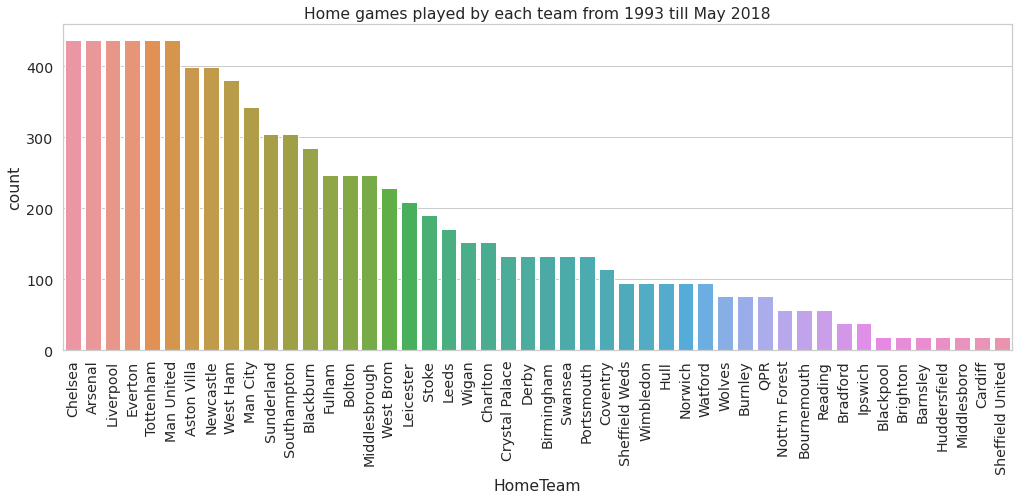

In [119]:
# Number of home games played by each team from 1993 till May 2018
#Tottenham           479
#Man United          479
#Everton             479
#Chelsea             479
#Liverpool           479
#Arsenal             479
descending_order = epl_dataset['HomeTeam'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(17, 6))
sns.countplot(x='HomeTeam', data=epl_dataset, order=descending_order)
#sns.countplot(x='HomeTeam', data=epl_dataset)
plt.xticks(rotation='vertical')
plt.title('Home games played by each team from 1993 till May 2018')

plt.show()

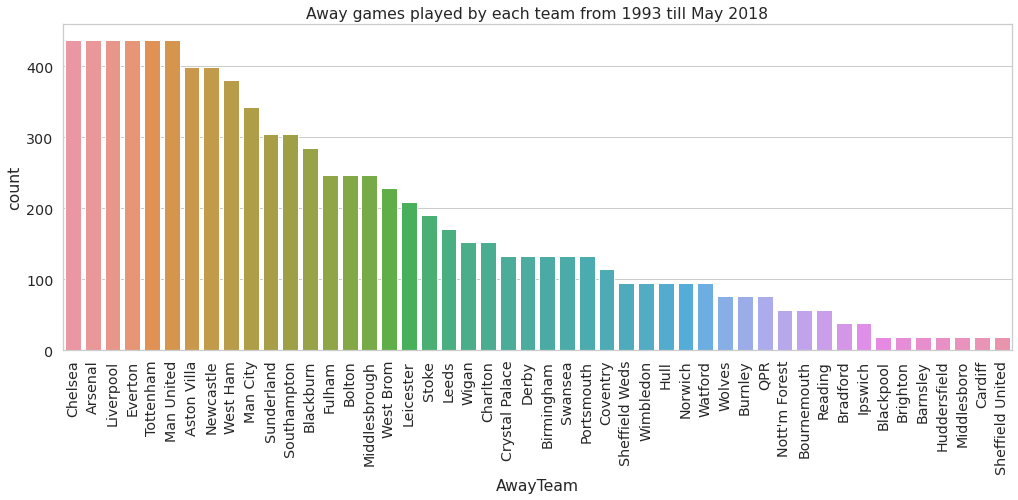

In [120]:
# Number of Away games played by each team from 1993 till May 2018
#Tottenham           479
#Man United          479
#Everton             479
#Chelsea             479
#Liverpool           479
#Arsenal             479
descending_order = epl_dataset['AwayTeam'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(17, 6))
sns.countplot(x='AwayTeam', data=epl_dataset, order=descending_order)
#sns.countplot(x='AwayTeam', data=epl_dataset)
plt.xticks(rotation='vertical')
plt.title('Away games played by each team from 1993 till May 2018')

plt.show()

**Observations** </BR>

Number of home and Away games played by each team from 1993 till 2018 .Following are the teams who have been there across all the seasons right from 1993 .Rest of the teams have been relegated atleast once.</br>
Tottenham - 479</br>
Man United - 479</br>
Everton - 479</br>
Chelsea - 479</br>
Liverpool - 479</br>
Arsenal - 479</br>

<a id=section402></a>
### 4.2 Number of Teams in each Season

In [121]:
epl_dataset.groupby('Season')['HomeTeam'].nunique()

Season
1995-96    20
1996-97    20
1997-98    20
1998-99    20
1999-00    20
2000-01    20
2001-02    20
2002-03    20
2003-04    20
2004-05    20
2005-06    20
2006-07    20
2007-08    20
2008-09    20
2009-10    20
2010-11    20
2011-12    20
2012-13    20
2013-14    20
2014-15    20
2015-16    20
2016-17    20
2017-18    20
Name: HomeTeam, dtype: int64

**Observations** </BR>

There are 22 teams in the first two seasons (1993-94 & 1994-95) later number of teams have been reduced to 20

<a id=section403></a>
###4.3 Percentage win by Team 

Text(0.5, 1.0, 'Percentage of Win/Loss/Draw at Away Ground')

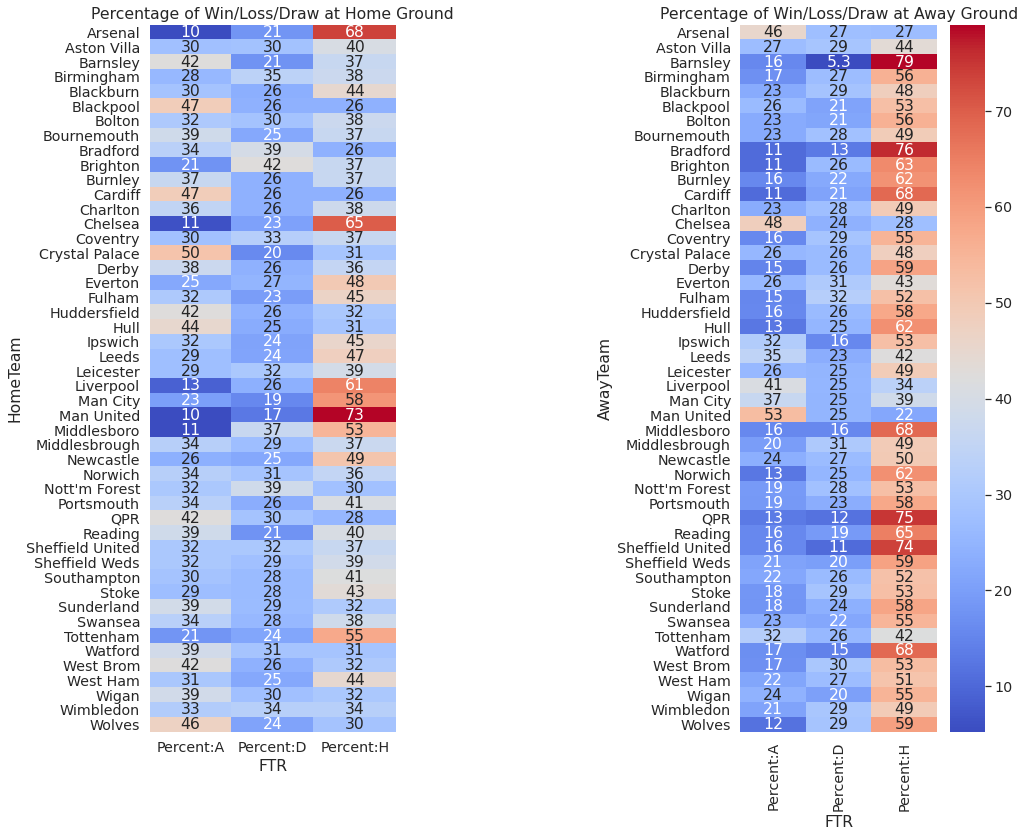

In [122]:
plt.figure(figsize=(15,13))
plt.subplot(1,3,1)
epl_dataset_home_team=epl_dataset.pivot_table(values='AwayTeam',index='HomeTeam',columns='FTR',aggfunc='count')
Total=epl_dataset_home_team.sum(axis=1)
for i in epl_dataset_home_team.columns.tolist():
    epl_dataset_home_team['Percent:'+i]=100*epl_dataset_home_team[i]/Total
sns.heatmap(epl_dataset_home_team[['Percent:A','Percent:D','Percent:H']],cmap='coolwarm',annot=True,cbar=False)
plt.title('Percentage of Win/Loss/Draw at Home Ground')
#plt.tight_layout()

plt.subplot(1,3,3)
epl_dataset_away_team=epl_dataset.pivot_table(values='HomeTeam',index='AwayTeam',columns='FTR',aggfunc='count')
Total=epl_dataset_away_team.sum(axis=1)
for i in epl_dataset_away_team.columns.tolist():
    epl_dataset_away_team['Percent:'+i]=100*epl_dataset_away_team[i]/Total
sns.heatmap(epl_dataset_away_team[['Percent:A','Percent:D','Percent:H']],cmap='coolwarm',annot=True)
plt.title('Percentage of Win/Loss/Draw at Away Ground')
#plt.tight_layout()

**Observations** </BR>

Percentage win by Home Team

*   Manchester United,Arsenal,Chealsea, Liverpool are the best performer on Home Ground respectively in order.
*   Oldham,Swindon,Blackpool are the worst permormer on Home Ground


Percentage win by Away Team

*   Manchester United,Chealsea,Arsenal are the best perfomer at Away  fixtures.
*   Swnindon, Wolves,Norwich Middelesborough are the bad performer at Away fixtures






<a id=section404></a>
### 4.4 Winning Streak Home,Away,Draw

Text(0.5, 1.0, 'Count of Home/Away/Draw')

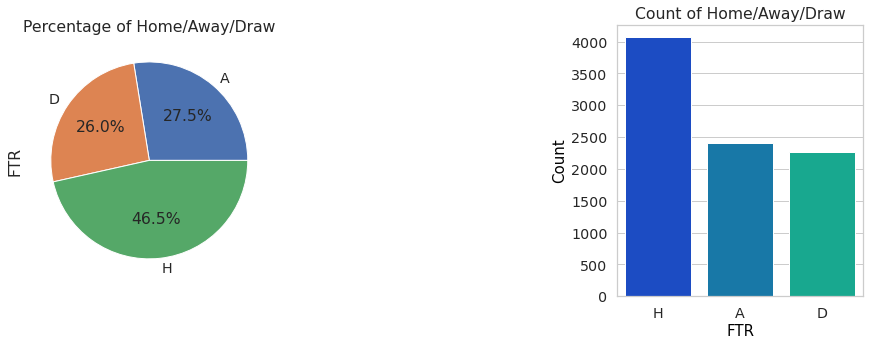

In [123]:
#Home team have an advantage with maximum percentage.
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
epl_dataset.groupby('FTR')['FTR'].count().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Home/Away/Draw')
plt.subplot(1,3,3)
descending_order = epl_dataset['FTR'].value_counts().sort_values(ascending=False).index

sns.countplot(data=epl_dataset,x="FTR",palette="winter",order=descending_order)
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("Count",size=15,color="Black")
plt.title('Count of Home/Away/Draw')

**Observation**</BR>
1.Just By looking at the Counts we can get the Understanding that the Home team have Significantly more wins. Playing at home is a big advantage.</br>
2.Away Team is more likely to get a Draw or a loss more often


<a id=section5></a>
## 5.Goals Analysis

<a id=section501></a>
### 5.1 Goals Comparison using Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd175640b00>,
      dtype=object)

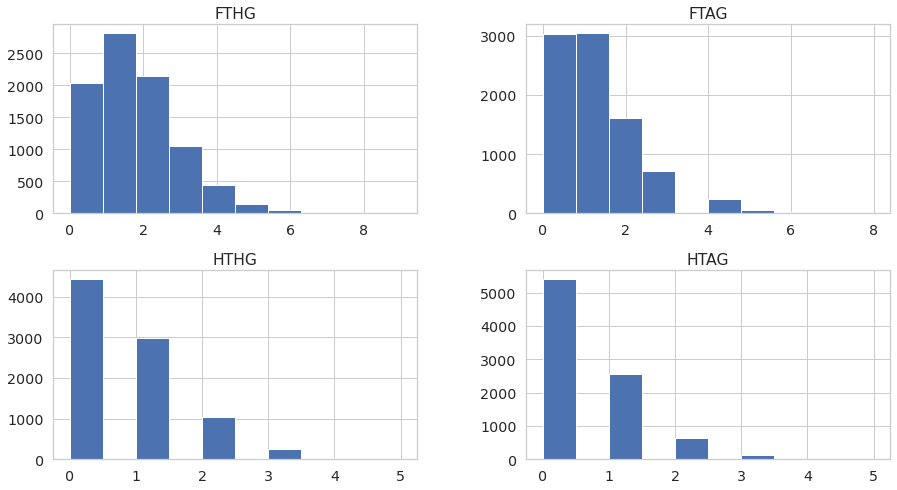

In [124]:
epl_dataset.hist(figsize=(15, 8))

**Observations**</BR>
There are more goals in team at home


<a id=section502></a>
### 5.2 Average Goals Per Season

In [125]:
epl_dataset['total_goals'] = epl_dataset['FTHG'] + epl_dataset['FTAG']
epl_dataset.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,total_goals
0,1995-08-19,Aston Villa,Man United,3,1,H,3,0,H,1995-96,4
1,1995-08-19,Blackburn,QPR,1,0,H,1,0,H,1995-96,1
2,1995-08-19,Chelsea,Everton,0,0,D,0,0,D,1995-96,0
3,1995-08-19,Liverpool,Sheffield Weds,1,0,H,0,0,D,1995-96,1
4,1995-08-19,Man City,Tottenham,1,1,D,0,1,A,1995-96,2


Text(0, 0.5, 'Average Goals')

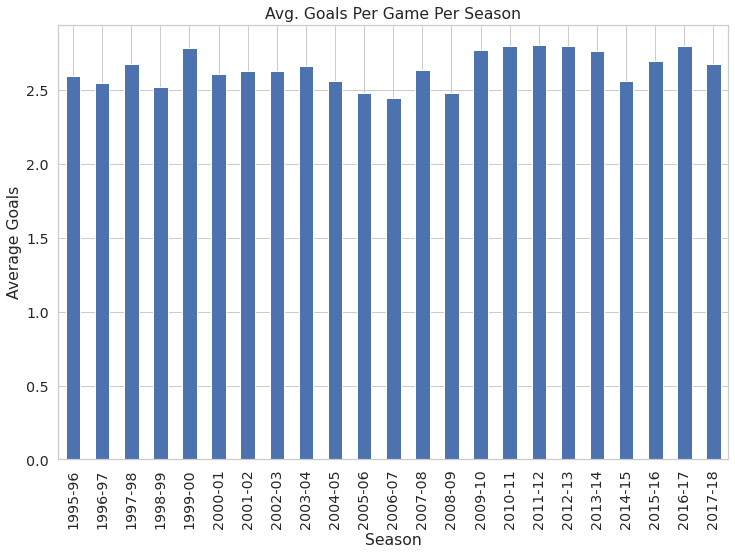

In [126]:
# show average goals per game per season
ab = epl_dataset.groupby('Season')['total_goals'].mean().plot(kind="bar", title="Avg. Goals Per Game Per Season", figsize=(12, 8))
ab.set_xlabel("Season")
ab.set_ylabel("Average Goals")

 **Observations**</BR>
The Average goals per game per season always tends to be more than 2 goals.


<a id=section503></a>
### 5.3 Number of Goals scored across season

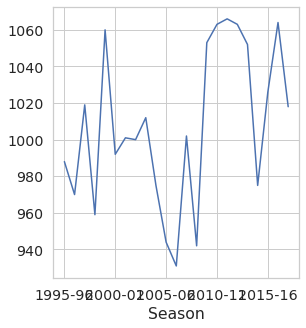

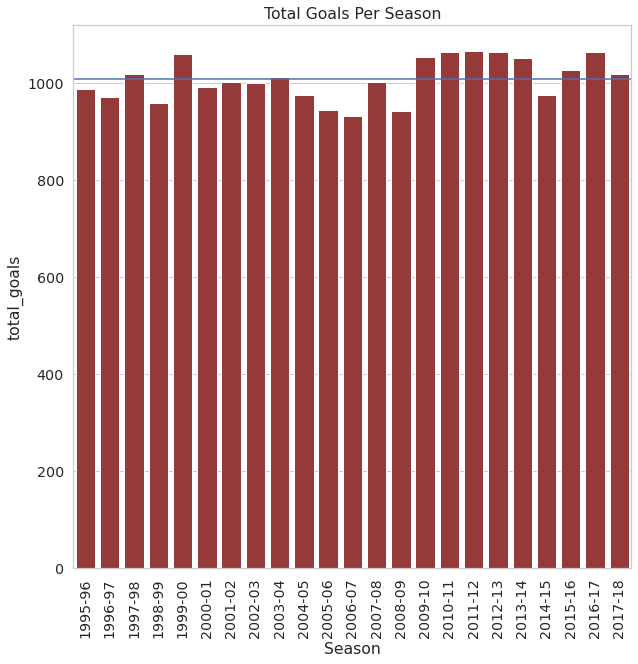

In [127]:
# Number of total goals per season has decreased over time
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
epl_dataset.groupby('Season')['total_goals'].sum().plot()


#Let us now see the number of goals per season.

#epl_dataset['Total Goals']= epl_dataset['FTHG'] + epl_dataset['FTAG']
plt.figure(figsize=(10,10))
#plt.subplot(1,3,3)
loca = epl_dataset.loc[:,['Season','total_goals']]
summ =loca.groupby('Season').sum().reset_index()
tot = summ['total_goals']

grid=sns.barplot(x='Season',y='total_goals',data=summ,color='brown')
grid.set_xticklabels(summ['Season'],rotation=90)
plt.title('Total Goals Per Season')
plt.axhline(tot.mean())
plt.show()


**Observations**</BR>
The total number of goals per season has gone down, due to the fact that the number of games per season has decreased since the earlier stages of the league.Also possibly the competitiveness of the game have increased


<a id=section504></a>
### 5.4 Goals Scored By Each Team Home and Away 

Text(0.5, 1.0, 'HomeTeam Goals')

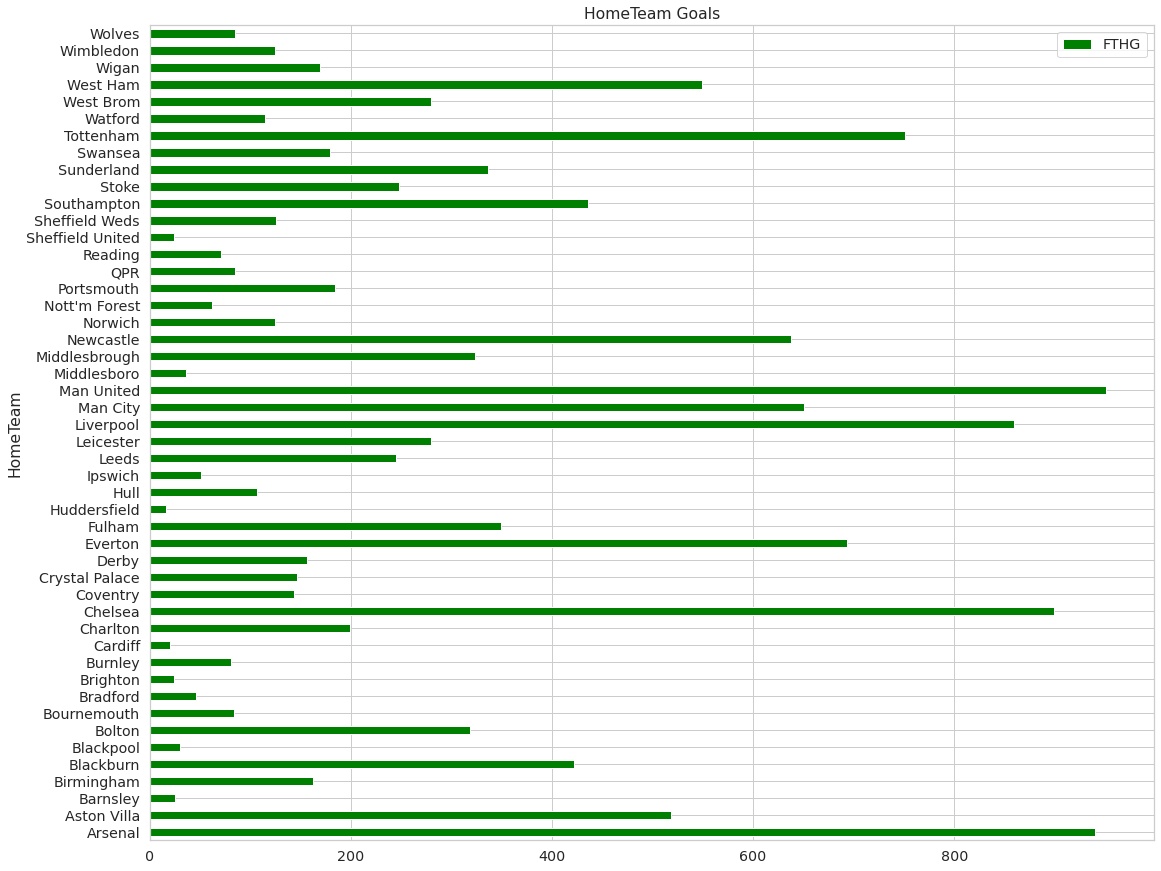

In [128]:
# #Manchesteer Utd have scored the most home goals
plt.rcParams['figure.figsize'] = [18, 15]
epl_dataset[['HomeTeam',
 'FTHG']].groupby('HomeTeam').sum().plot.barh(
 color='green')
plt.title('HomeTeam Goals') 


Text(0.5, 1.0, 'AwayTeam Goals')

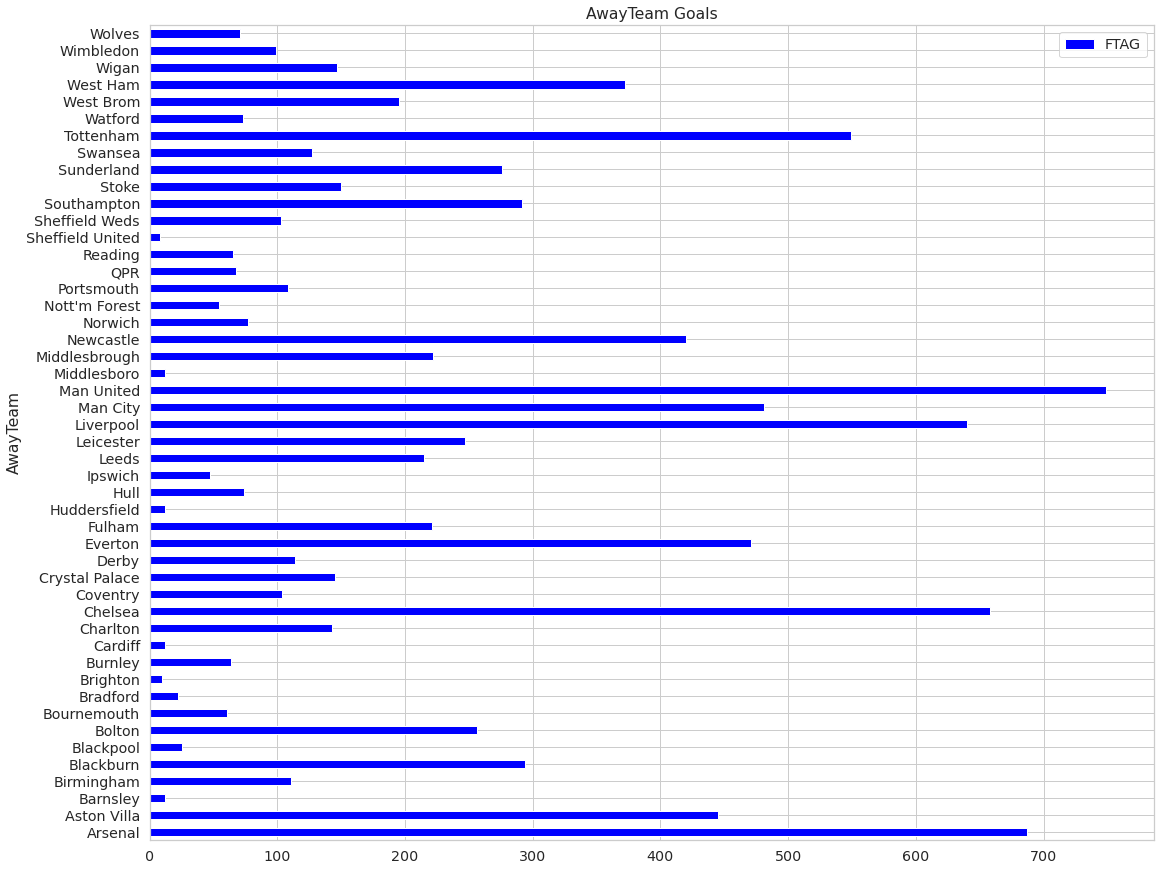

In [129]:
#Manchesteer Utd have scored the most Away goals
plt.rcParams['figure.figsize'] = [18, 15]
epl_dataset[['AwayTeam',
 'FTAG']].groupby('AwayTeam').sum().plot.barh(
 color='blue')
plt.title('AwayTeam Goals')

Text(0.5, 1.0, 'Total goal at Away Ground')

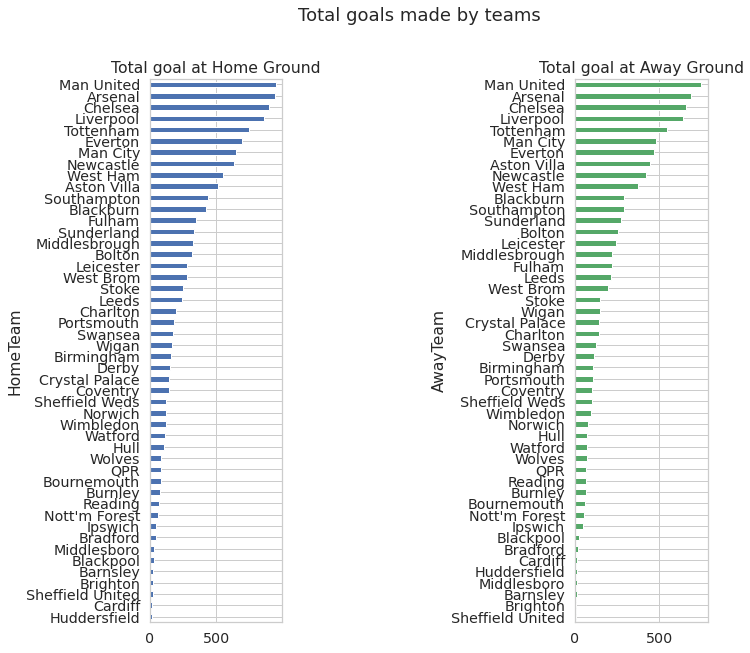

In [130]:
pd.set_option('display.max_columns',500)
df_goal=epl_dataset.pivot_table(values=['FTHG','FTAG'],index='HomeTeam',columns='AwayTeam',aggfunc='sum')

plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace= .6)
plt.suptitle('Total goals made by teams',fontsize=18)
plt.subplot(1,3,1)
df_goal.xs('FTHG',level=0,axis=1).sum(axis=1).sort_values(ascending=True).plot(kind='barh')
plt.title('Total goal at Home Ground')
plt.subplot(1,3,3)
df_goal.xs('FTAG',level=0,axis=1).sum(axis=0).sort_values().plot(kind='barh',color='g')
plt.title('Total goal at Away Ground')


**Observations** </BR>
1) Man United, Arsenol, Chelsea, Liverpool in Home Ground respectively 
2) Man United, Arsenol, Chelsea, Liverpool at Away Ground respectively


<a id=section505></a>
### 5.5 Probability Density Function Comparison for Home and Away Team 

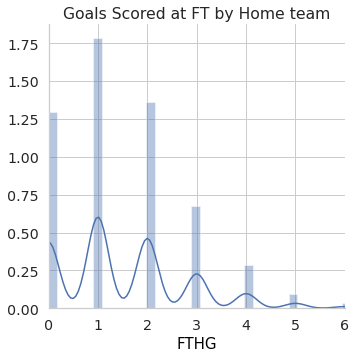

In [131]:
sns.set_style("whitegrid")
a=sns.FacetGrid(epl_dataset,size=5) \
   .map(sns.distplot,"FTHG") \
   .add_legend()
plt.xlim(0,6)
plt.xlabel("FTHG",size=15,color="Black")
plt.title("Goals Scored at FT by Home team")
plt.show()

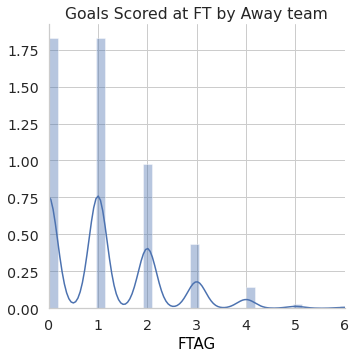

In [132]:
sns.set_style("whitegrid")
sns.FacetGrid(epl_dataset,size=5) \
   .map(sns.distplot,"FTAG") \
   .add_legend()
plt.xlabel("FTAG",size=15,color="Black")
plt.title("Goals Scored at FT by Away team")
plt.xlim(0,6)
plt.show()

 
1.   Both Home and Away Team scores 1 goal most of the times</br>
2.   Frequent scores (1,0,2).Home team slightly ahead here.</br>
3.   However, When it come to more than 2 goals, Home Teams are ahead.







<a id=section506></a>
### 5.6 Result and Goal Scored Comparison for Home Team  & Away Team

In [133]:
epl_dataset.groupby('FTR')['FTHG'].mean()

FTR
A    0.568163
D    0.971366
H    2.410187
Name: FTHG, dtype: float64

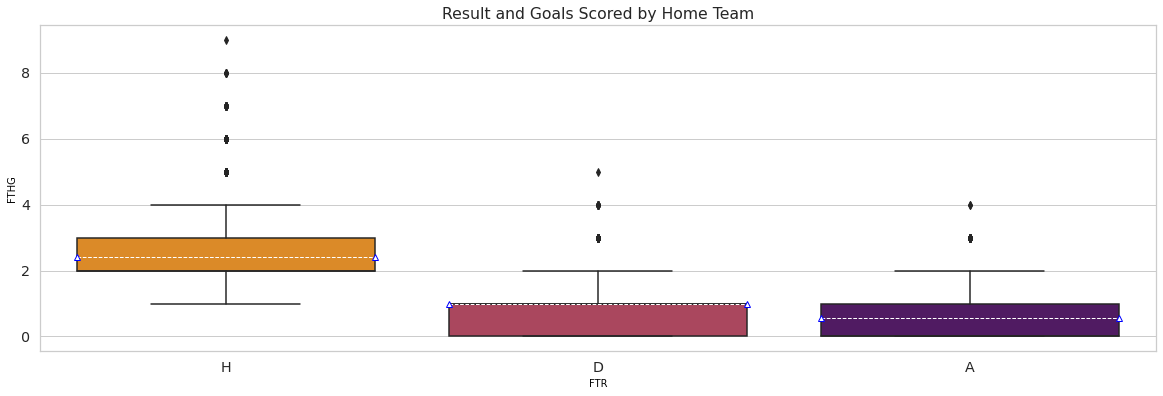

In [134]:

plt.figure(figsize=(20, 6))
sns.boxplot(data=epl_dataset,x="FTR",y="FTHG",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Goals Scored by Home Team")
plt.xlabel("FTR",size=10,color="Black")
plt.ylabel("FTHG",size=10,color="Black")
plt.show()

**Observations on Home Team** </BR>
1.   While winning score mean of 2.408429 Goals.</br>
2.   When Drawn mean is 0.967400 Goals.</br>
3.   When Lost Mean is 0.572074 Goals.

In [135]:
epl_dataset.groupby('FTR')['FTAG'].mean()

FTR
A    2.258936
D    0.971366
H    0.533465
Name: FTAG, dtype: float64

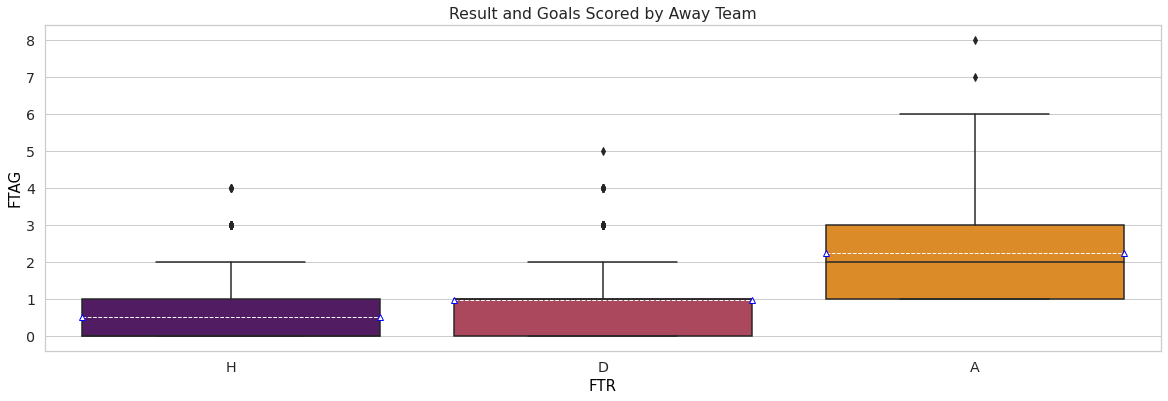

In [136]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=epl_dataset,x="FTR",y="FTAG",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Goals Scored by Away Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTAG",size=15,color="Black")
plt.show()

**Observations on Away Team**  </BR>  
1.   While winning score mean of 2.255175 Goals.</br>
2.   When Drawn mean is 0.967400 Goals.</br>
3.   When Lost Mean is 0.534185 Goals.</br>


Overall **Home Team** Scoring more goals will be a huge factor in winning the game.

<a id=section6></a>
## 6.PairPlot Analysis

<Figure size 1440x432 with 0 Axes>

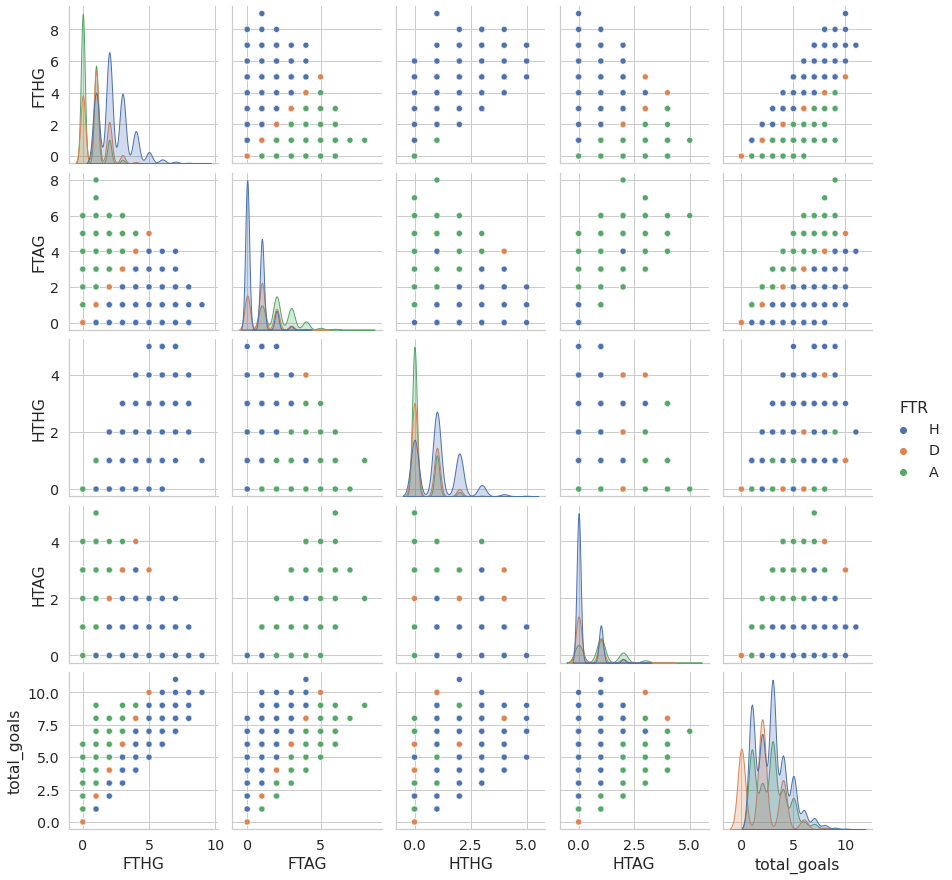

In [137]:
plt.figure(figsize=(20, 6))
sns.pairplot(epl_dataset,hue="FTR")

**Observation** </BR>
1.   **FTHG** and **FTAG** are the values that indicates who will win.So studying these the variables can be the best way to to predict FTR</br>
2.   Higher value of the 2 variables denotes the team winning, Which translates to the team that score more Goals at FT wins the match.</br>



Overall **Home Team** Scoring more goals will be a huge factor in winning the game.

<a id=section7></a>
## 7.Half Time Results Affecting Full Time Results

Text(0, 0.5, 'Count')

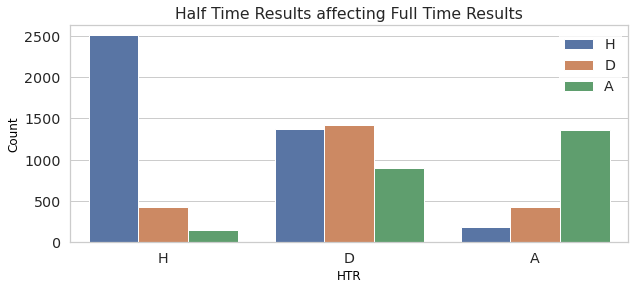

In [138]:
# Check If a team is Winning at HalfTime does it Change at Full Time.
plt.figure(figsize=(10, 4))
sns.countplot(data=epl_dataset,x="HTR",hue="FTR")
plt.title("Half Time Results affecting Full Time Results")
plt.legend(edgecolor="White",facecolor="White")
plt.xlabel("HTR",size=12,color="Black")
plt.ylabel("Count",size=12,color="Black")

**Observation  ** </BR>
1.   The team Leading at Half Time almost always goes on to win the game at Full time.</br>
2.   If the game is level at Half Time it is more likely Home team will win than the Away team. Although the most likely outcome is a Draw only.</br>
3.  So HTR is a very important variable to determine who wins at Full time</br>



Overall **Home Team** Scoring more goals will be a huge factor in winning the game.

<a id=section701></a>
### 7.1 Home Team Ahead at Half Time

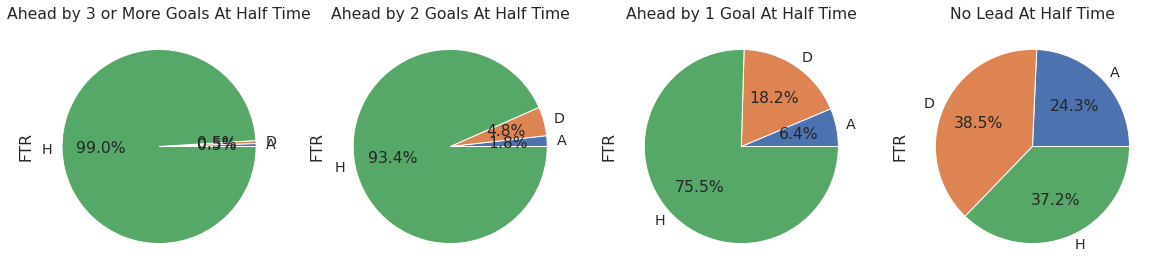

In [139]:
# x = epl_dataset[(epl_dataset.HTHG) - (epl_dataset.HTAG) >= 3].FTR.value_counts()

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
epl_dataset[(epl_dataset.HTHG) - (epl_dataset.HTAG) >= 3].groupby('FTR')['FTR'].count().plot(kind='pie', autopct='%1.1f%%')
plt.title('Ahead by 3 or More Goals At Half Time')
plt.subplot(1,4,2)
plt.title('Ahead by 2 Goals At Half Time')
epl_dataset[(epl_dataset.HTHG) - (epl_dataset.HTAG) == 2].groupby('FTR')['FTR'].count().plot(kind='pie', autopct='%1.1f%%')
plt.subplot(1,4,3)
plt.title('Ahead by 1 Goal At Half Time')
epl_dataset[(epl_dataset.HTHG) - (epl_dataset.HTAG) == 1].groupby('FTR')['FTR'].count().plot(kind='pie', autopct='%1.1f%%')
plt.subplot(1,4,4)
plt.title('No Lead At Half Time')
epl_dataset[(epl_dataset.HTHG) - (epl_dataset.HTAG) == 0].groupby('FTR')['FTR'].count().plot(kind='pie', autopct='%1.1f%%')


**Observation**</BR>

When Home Team leads by

*   3 or More Goals at first half 99% they went on to win the tie
*   2 goals lead at first half 93.4% they went on to win.Away team had bit of chances either to draw or win at FTR.
*   1 goal lead at first half home team still had better chance with 75.5% to win the tie.Away team had good chances to ensuree they can comeback to make the tie draw or win with slight chances.
*   No Lead at half time ensures the Away had good chance to make the tie draw or win it.Home Team could possibly suffer.Draw is having higher percentage




<a id=section702></a>
### 7.2 Away Team Ahead at Half Time

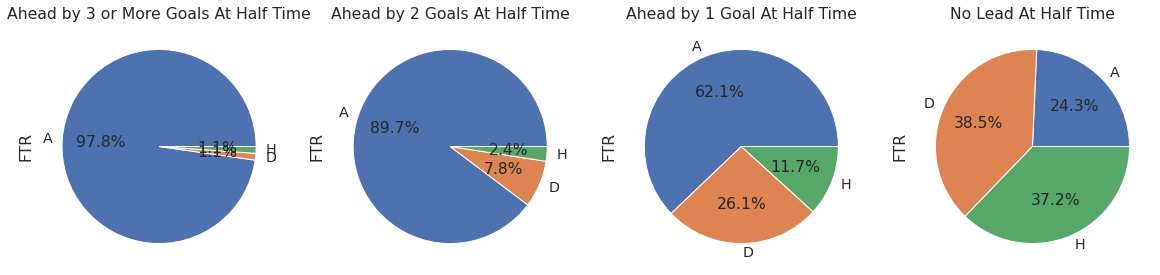

In [140]:
# x = epl_dataset[(epl_dataset.HTHG) - (epl_dataset.HTAG) >= 3].FTR.value_counts()

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
epl_dataset[(epl_dataset.HTAG) - (epl_dataset.HTHG) >= 3].groupby('FTR')['FTR'].count().plot(kind='pie', autopct='%1.1f%%')
plt.title('Ahead by 3 or More Goals At Half Time')
plt.subplot(1,4,2)
plt.title('Ahead by 2 Goals At Half Time')
epl_dataset[(epl_dataset.HTAG) - (epl_dataset.HTHG) == 2].groupby('FTR')['FTR'].count().plot(kind='pie', autopct='%1.1f%%')
plt.subplot(1,4,3)
plt.title('Ahead by 1 Goal At Half Time')
epl_dataset[(epl_dataset.HTAG) - (epl_dataset.HTHG) == 1].groupby('FTR')['FTR'].count().plot(kind='pie', autopct='%1.1f%%')
plt.subplot(1,4,4)
plt.title('No Lead At Half Time')
epl_dataset[(epl_dataset.HTAG) - (epl_dataset.HTHG) == 0].groupby('FTR')['FTR'].count().plot(kind='pie', autopct='%1.1f%%')


**Observation**</BR>

When Away Team leads by

*   3 or More Goals at first half 97% they went on to win the tie
*   2 goals lead at first half 89.7% they went on to win.Home team had bit of chances either to draw or win at FTR.
*   1 goal lead at first half Away team still had better chance with 62.1% to win the tie.Home team had good chances to ensuree they can comeback to make the tie draw or win with slight chances.
*   No Lead at half time ensures the Home had good chance to make the tie draw or win it.Draw is having higher percentage.

In [141]:
conditions=[epl_dataset['FTR']=='A',epl_dataset['FTR']=='H',epl_dataset['FTR']=='D']
choices = [epl_dataset['AwayTeam'],epl_dataset['HomeTeam'],'Draw']
epl_dataset['Winner']=np.select(conditions,choices)

In [142]:
count_epl_dataset = epl_dataset[['Season','Winner']].groupby(['Season','Winner']).size().reset_index(name='Count').sort_values(['Season', 'Count'],
                                                                                                   ascending=[True, False])
count_epl_dataset

,Season,Winner,Count
6,1995-96,Draw,98
11,1995-96,Man United,25
13,1995-96,Newcastle,24
9,1995-96,Liverpool,20
1,1995-96,Aston Villa,18
...,...,...,...
470,2017-18,Huddersfield,9
478,2017-18,Swansea,8
476,2017-18,Southampton,7
477,2017-18,Stoke,7


In [143]:
count_epl_dataset.groupby('Season').tail(4)

,Season,Winner,Count
15,1995-96,QPR,9
17,1995-96,Southampton,9
3,1995-96,Bolton,8
5,1995-96,Coventry,8
40,1996-97,West Ham,10
...,...,...,...
453,2016-17,Middlesbrough,5
478,2017-18,Swansea,8
476,2017-18,Southampton,7
477,2017-18,Stoke,7


<a id=section8></a>
## 8.Champions League Qualified Counts

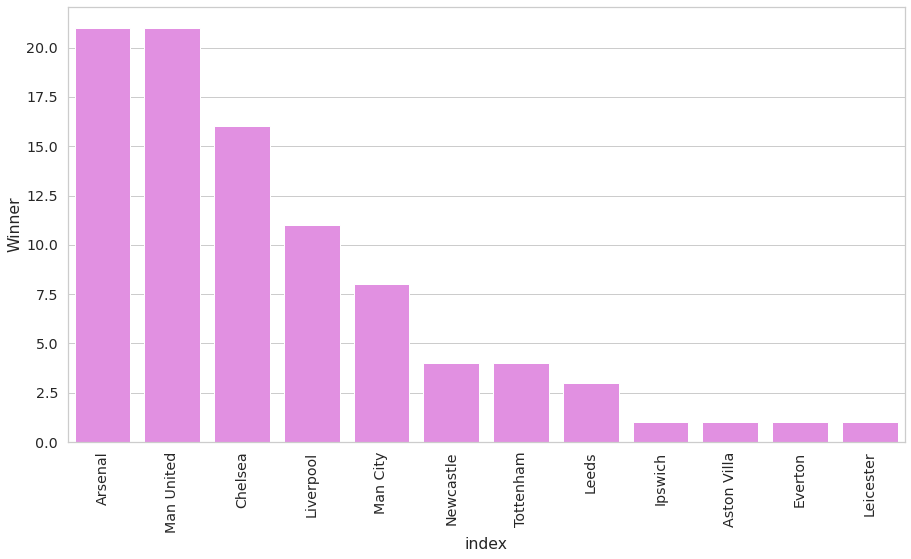

In [144]:
rem_draws1 = count_epl_dataset[count_epl_dataset.Winner.str.contains('Draw')==False].reset_index()
rem_draws1

top4 = rem_draws1.groupby('Season').head(4)
valc = top4['Winner'].value_counts().reset_index()
plt.figure(figsize=(15,8))
grid1=sns.barplot(x='index',y='Winner',data= valc, color='violet')
grid1.set_xticklabels(valc['index'],rotation=90)
plt.show()

<a id=section9></a>
## 9.Number of Titles by each team across seasons

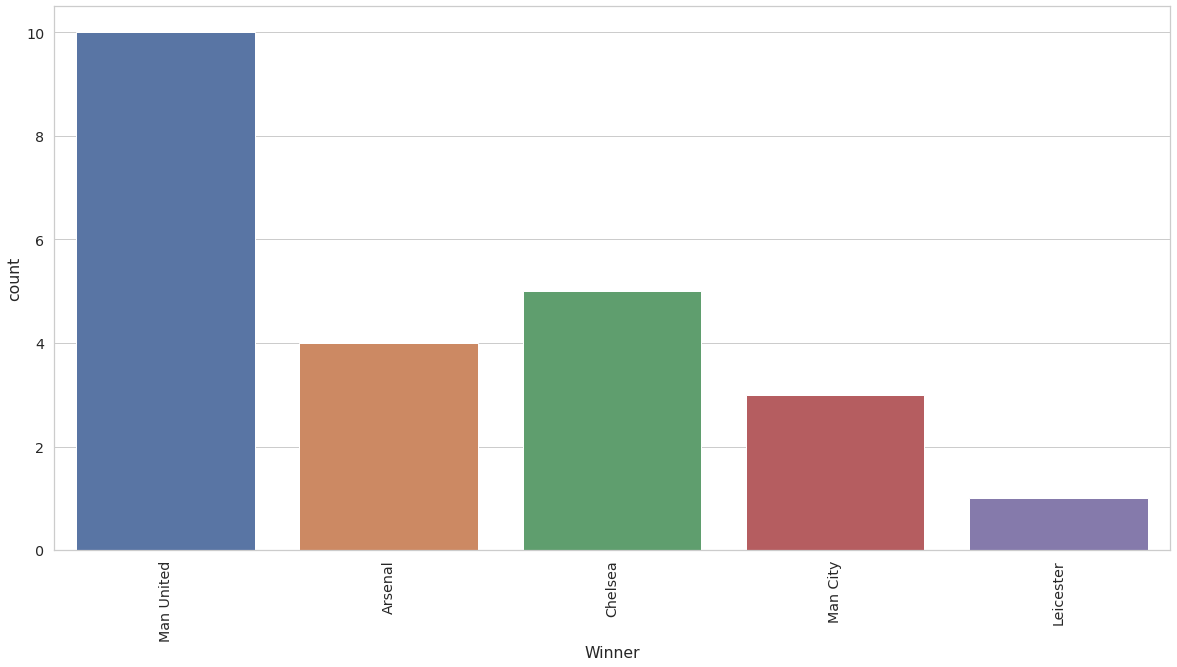

In [145]:


#Now we can print the Team that has won most of the matches in each Season.

most_wins=epl_dataset[['Season','Winner']].groupby(['Season','Winner']).size().reset_index(name='Count').sort_values(['Season', 'Count'], ascending=[True, False])
most_wins=most_wins[most_wins['Winner'].str.contains('Draw')==False].groupby('Season').head(1)
most_wins
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.countplot(x='Winner', data=most_wins)

**Observation ** </BR>
we can see that** Manchester United** are clearly the team with most number of wins each season.

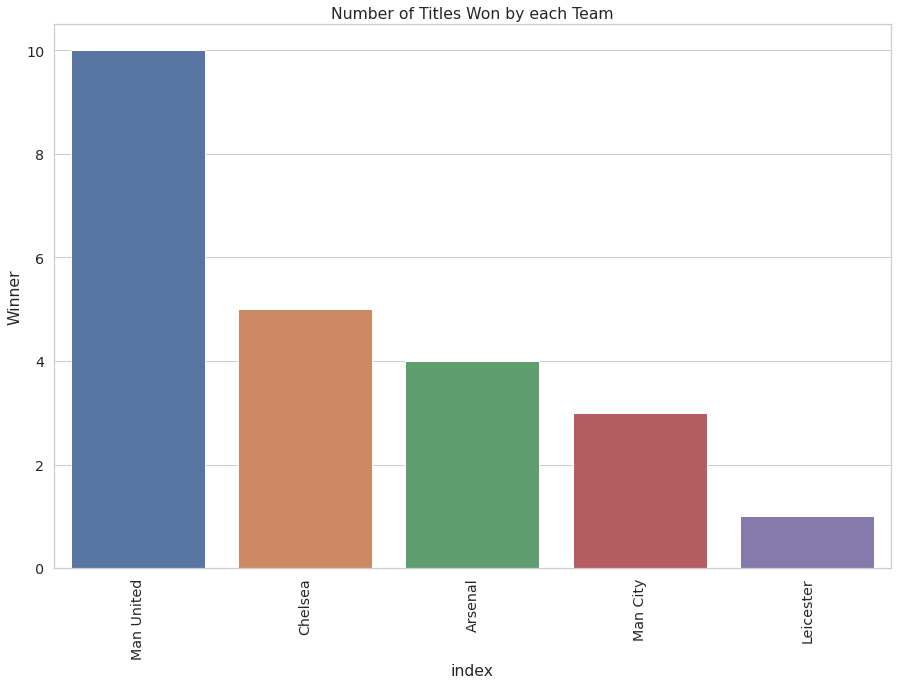

In [146]:
titles= most_wins['Winner'].value_counts().reset_index()
titles
plt.figure(figsize=(15, 10))
plt.title("Number of Titles Won by each Team")
plt.xticks(rotation='vertical')
sns.barplot(x='index', y='Winner', data=titles)

**Observation** </BR>
Number of titles won by each team.**Manchester United** have most number of titles.

In [147]:
# removing observations with blank half-time scores

epl_half_dataset = epl_dataset.dropna()
epl_half_dataset.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,total_goals,Winner
0,1995-08-19,Aston Villa,Man United,3,1,H,3,0,H,1995-96,4,Aston Villa
1,1995-08-19,Blackburn,QPR,1,0,H,1,0,H,1995-96,1,Blackburn
2,1995-08-19,Chelsea,Everton,0,0,D,0,0,D,1995-96,0,Draw
3,1995-08-19,Liverpool,Sheffield Weds,1,0,H,0,0,D,1995-96,1,Liverpool
4,1995-08-19,Man City,Tottenham,1,1,D,0,1,A,1995-96,2,Draw


<a id=section10></a>
## 10.Conclusion
1. There is a Higher percentage of Home team winning, so clearly the team playing at Home will be having an advantage. </br>

2. The Home team usually score more goals. Ex While winning Home team score mean of 2.5 Goals as compared to 2.1 Goals by Away team while winning.</br>

3. HTR is a very important variable to determine who wins at Full time. As we saw the Team winning at Half team does not usually end up Losing at Full time. So this Variable can effectively predict who is likely to win at full time.</br>

4. If Home Team or Away Team are ahead by 2+ goals at half time they are likely to win the tie with 90% almost favouring them.</BR>

5. Inorder to Sustain in league Home Team should take advantage of their home conditions and should be able to be lead by 2 or more goals at half time which would favour them to win the tie.Away Team should atleast lead by a goal at HT in order to make the tie a 'draw' or favour them results.</BR>

6. Manchester United have the most number of title during the premier 
league era. They have been consistently winning for 11 times.2nd comes chealsea with 5 league titles.</br>

7. Top 4 from each season qualifies for the most prestigious league "Champions League".



